# 2.Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 3. Reading Data Set

In [2]:
df=pd.read_csv('creditcard.csv')
print('lets data features (first 5 rows) are \n',df.head())

lets data features (first 5 rows) are 
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206

In [3]:
print("Size of data set \n-  rows:",df.shape[0]," columns:",df.shape[1])

Size of data set 
-  rows: 284807  columns: 31


In [4]:
#More details of the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Now the Time feature from above table, we can confirm that the data contains 284,807 transactions, during 172792 seconds(2 consecutive days).

**3.1 Check missing data**

Let's check if there is any missing data.

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There is no missing data in the entire dataset.

# 4.Exploratory data analysis


<AxesSubplot:xlabel='Time', ylabel='Count'>

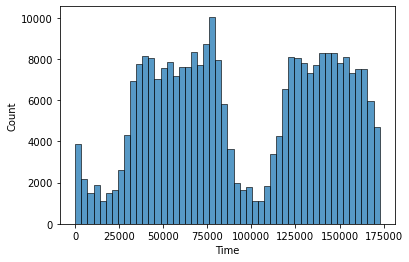

In [6]:
#Distribution of Time column 
sns.histplot(df.Time,bins=50)

In [7]:
# Distribution of Class column
class_counts=df.Class.value_counts()
class_counts

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'counts')

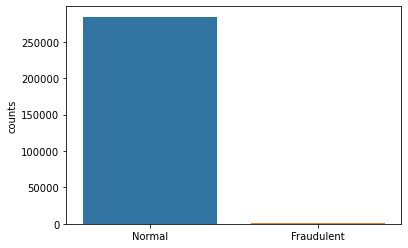

In [8]:
g=sns.barplot(x=class_counts.index,y=class_counts.values)
g.set_xticklabels(['Normal','Fraudulent'])
g.set_ylabel('counts')

In [9]:
print("Percentage of Normal transactions is {:.2f}%".format(df.Class.value_counts()[0]/len(df)*100))
print("Percentage of Fraudulent transactions is {:.2f}%".format(df.Class.value_counts()[1]/len(df)*100))

Percentage of Normal transactions is 99.83%
Percentage of Fraudulent transactions is 0.17%


Only 492 (or 0.17%) of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable Class.

**Bivariate Analysis**

**Transactions in time**

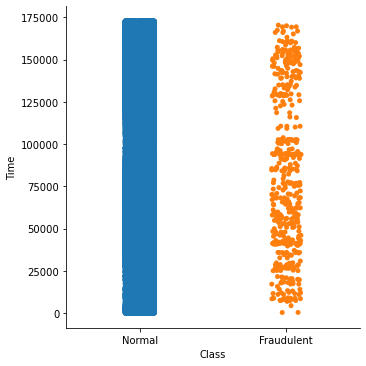

In [10]:
# Distribution of Time per Class
h = sns.catplot(x="Class", y="Time", data=df)
h.set_xticklabels(['Normal','Fraudulent'])

from the above plot,the range of transaction time is almost the same for both types of transactions.


**Transactions amount**

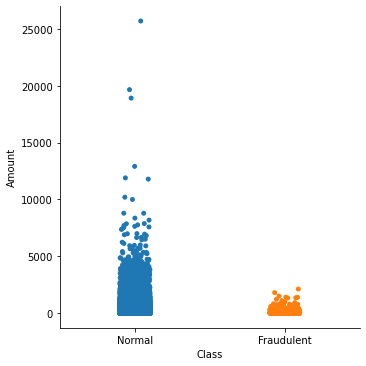

In [11]:
# Distribution of Amount per Class
g = sns.catplot(x="Class", y="Amount", data=df)
g.set_xticklabels(['Normal','Fraudulent'])

now from the above plot,The range of transaction amount for Normal transactions is high than Fraudulent.

<AxesSubplot:xlabel='Class', ylabel='Amount'>

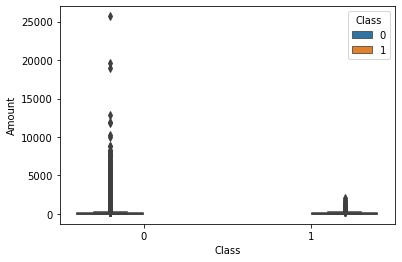

In [12]:
sns.boxplot(x="Class", y="Amount", hue="Class",data=df)

**Features correlation**

From the above heatmap, 
* There is no notable correlation between features V1-V28. 
* There are certain correlations between some of these features and Time (inverse correlation with V3). 
* Features and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

<AxesSubplot:>

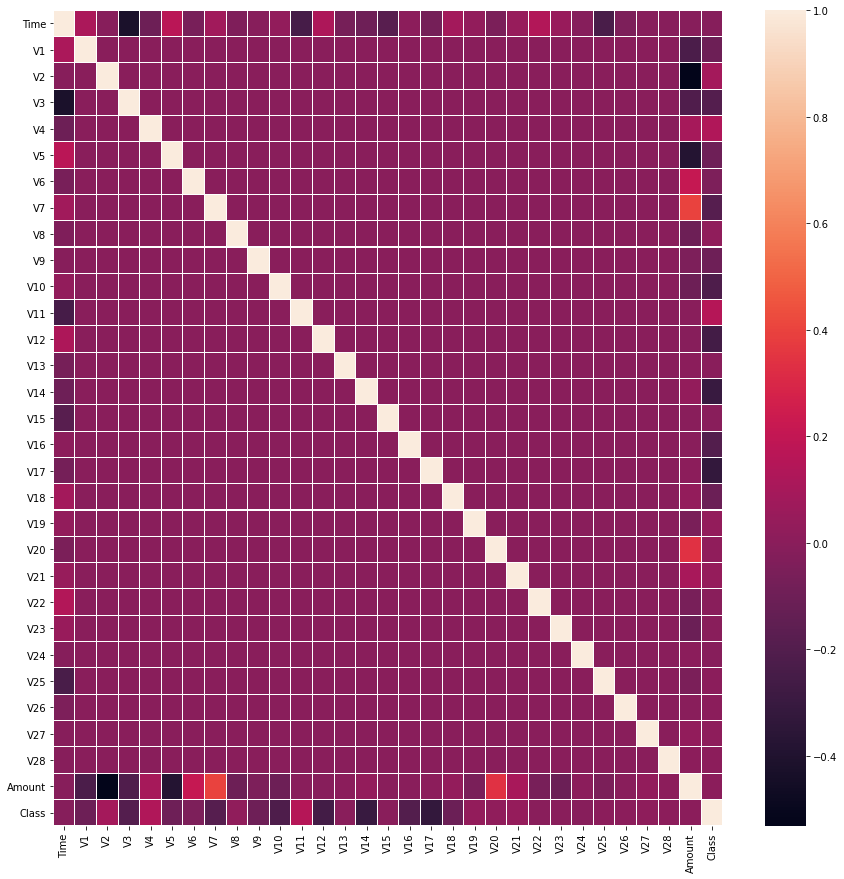

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),linewidths=.1)

# 5 Data cleaning or pre-processing
Data preprocessing is the concept of changing the raw data into a clean data set. The dataset is preprocessed in order to check missing values, noisy data, and other inconsistencies before executing it to the algorithm.

<AxesSubplot:ylabel='Class'>

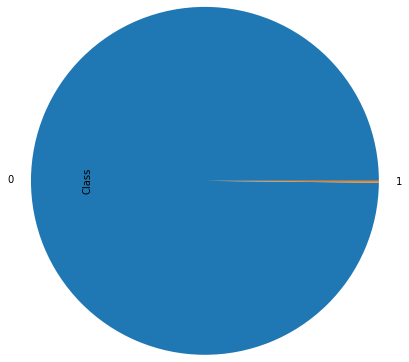

In [14]:
df['Class'].value_counts().plot.pie(radius=2)

**Features Separating**

Seperated dependent features(Class) and independent features(remaining)

In [15]:
#independent & dependent features
x=df.drop('Class',axis=1)
y=df['Class']

In [16]:
print(x.shape)
print(y.shape)

(284807, 30)
(284807,)


**Sampling Technique - SMOTE**

before smote


<AxesSubplot:>

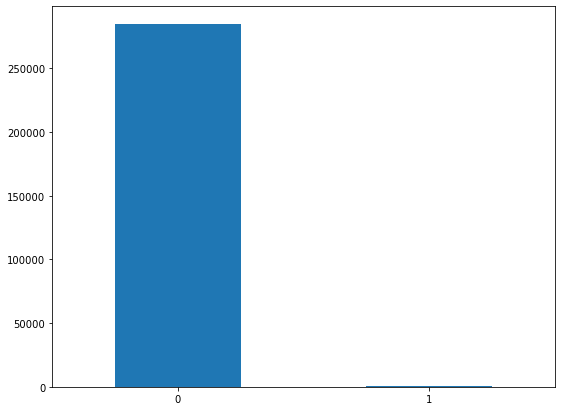

In [17]:
print("before smote")
y.value_counts().plot.bar(figsize=(9, 7), rot=0)

AFTER SMOTE


<AxesSubplot:>

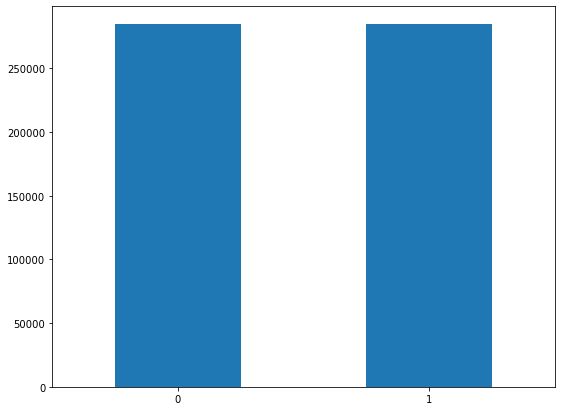

In [18]:
# implement smote now
smote = SMOTE(random_state=42)
X,Y  = smote.fit_resample(x, y)

print("AFTER SMOTE")
Y.value_counts().plot.bar(figsize=(9, 7), rot=0)

<AxesSubplot:ylabel='Class'>

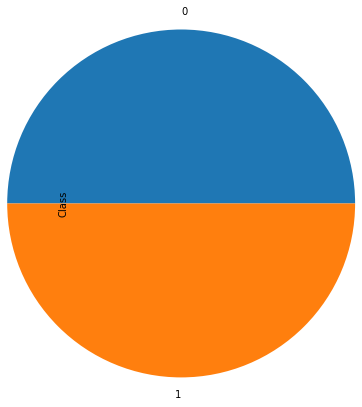

In [19]:
Y.value_counts().plot.pie(radius=2)

In [20]:
X.shape,Y.shape

((568630, 30), (568630,))

**Splitting Data Set**

Let data set will be split into 70% train and 30% test.

In [21]:
#split data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42,test_size=.3)

# 6 Models

In [22]:
lr=LogisticRegression(max_iter=500)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('Confusion matrix')
print()
print(confusion_matrix(y_test,y_pred))
print()
print('Classification Report')
print(classification_report(y_test,y_pred))
print()
from sklearn.metrics import accuracy_score
acLR=accuracy_score(y_test,y_pred)
print('Logistic Regression accuracy:{:.2f}%'.format(acLR*100))

Confusion matrix

[[83648  1501]
 [ 2996 82444]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     85149
           1       0.98      0.96      0.97     85440

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589


Logistic Regression accuracy:97.36%


In [23]:
svc=SVC(max_iter=500)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('confusion matrix:\n',confusion_matrix(y_test,y_pred))
print('\n Classification report:\n',classification_report(y_test,y_pred))
from sklearn.metrics import accuracy_score
auSV=accuracy_score(y_test,y_pred)
print('SVM Accuracy: {:2f}%'.format(auSV*100))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


confusion matrix:
 [[54571 30578]
 [45569 39871]]

 Classification report:
               precision    recall  f1-score   support

           0       0.54      0.64      0.59     85149
           1       0.57      0.47      0.51     85440

    accuracy                           0.55    170589
   macro avg       0.56      0.55      0.55    170589
weighted avg       0.56      0.55      0.55    170589

SVM Accuracy: 55.362304%


In [24]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred))
print('Classification report')
print(classification_report(y_test,y_pred))
acRF=accuracy_score(y_test,y_pred)
print("Random Forest Accuracy:  {:.2f}%".format(acRF*100))

Confusion matrix
[[85132    17]
 [    1 85439]]
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Random Forest Accuracy:  99.99%


In [25]:
compare = pd.DataFrame({'Model': ['Logistic Regression','SVM','Random Forest'], 
                        'Accuracy': [acLR*100,auSV*100,acRF*100]})
compare

,Model,Accuracy
0,Logistic Regression,97.363839
1,SVM,55.362304
2,Random Forest,99.989448
